### Linear Regression Viability
- Dummy Coding
- Viability Analysis 
- Correlation between variables and target
- Checking for linearity
- Charts: correlation heatmap, pairplots, regression plots
- Initial Linear Regression model via statsmodels
- Plot Residuals vs Predictions
- Rating Analysis: Box Plot

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
movie_df = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression_Take2/movies_cleaned.csv')
movie_df.head()

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,Gross_Adjust
0,The Dark Knight,152,"Action, Crime, Drama",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,673149069.9
1,The Hunger Games: Catching Fire,146,"Action, Adventure, Drama",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,493965967.5
2,The Hunger Games,142,"Action, Adventure, Sci-Fi",PG-13,408010000.0,Gary Ross,Jennifer Lawrence,2012,78000000.0,92056674.0,481539019.7
3,Jurassic Park,127,"Action, Adventure, Sci-Fi",PG-13,402450000.0,Steven Spielberg,Sam Neill,1993,63000000.0,118139169.6,754684266.4
4,Furious 7,137,"Action, Crime, Thriller",PG-13,353010000.0,James Wan,Vin Diesel,2015,190000000.0,217217752.3,403579151.3


#### Get Dummies

In [4]:
movie_df['Genre'] = movie_df.Genre.str.replace(" ",'')
movie_df['Genre'] = movie_df.Genre.str.split(',')
genre_df = pd.get_dummies(movie_df.Genre.apply(pd.Series).stack()).sum(level=0)
movie_df = pd.concat([movie_df, genre_df], axis=1)

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_81782/2299708046.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genre_df = pd.get_dummies(movie_df.Genre.apply(pd.Series).stack()).sum(level=0)


In [5]:
movie_df.head()

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,Gross_Adjust,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Dark Knight,152,"[Action, Crime, Drama]",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,673149069.9,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Hunger Games: Catching Fire,146,"[Action, Adventure, Drama]",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,493965967.5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Hunger Games,142,"[Action, Adventure, Sci-Fi]",PG-13,408010000.0,Gary Ross,Jennifer Lawrence,2012,78000000.0,92056674.0,481539019.7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Jurassic Park,127,"[Action, Adventure, Sci-Fi]",PG-13,402450000.0,Steven Spielberg,Sam Neill,1993,63000000.0,118139169.6,754684266.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Furious 7,137,"[Action, Crime, Thriller]",PG-13,353010000.0,James Wan,Vin Diesel,2015,190000000.0,217217752.3,403579151.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
#not needed - in data clean up phase dropped rows of other ratings
#movie_df = movie_df[movie_df.Rating.isin(['PG','PG-13',"R"])]

In [7]:
movie_df = pd.concat([movie_df,pd.get_dummies(movie_df.Rating)],axis=1)
movie_df.head()

,Title,Duration,Genre,Rating,Gross,Director,Lead,Year,Budget_Update,Budget_Adjust,Gross_Adjust,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG,PG-13,R
0,The Dark Knight,152,"[Action, Crime, Drama]",PG-13,534860000.0,Christopher Nolan,Christian Bale,2008,185000000.0,232832101.7,673149069.9,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,The Hunger Games: Catching Fire,146,"[Action, Adventure, Drama]",PG-13,424670000.0,Francis Lawrence,Jennifer Lawrence,2013,130000000.0,151212884.8,493965967.5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,The Hunger Games,142,"[Action, Adventure, Sci-Fi]",PG-13,408010000.0,Gary Ross,Jennifer Lawrence,2012,78000000.0,92056674.0,481539019.7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,Jurassic Park,127,"[Action, Adventure, Sci-Fi]",PG-13,402450000.0,Steven Spielberg,Sam Neill,1993,63000000.0,118139169.6,754684266.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,Furious 7,137,"[Action, Crime, Thriller]",PG-13,353010000.0,James Wan,Vin Diesel,2015,190000000.0,217217752.3,403579151.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [8]:
movie_df.to_csv('movies_with_dummies.csv', index=False)

#### Regression Viability Charts: Genre Features, Duration, Budget, Ratings

In [9]:
first_set = movie_df[['Duration', 'Rating', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R']].copy()
first_set.head()

,Duration,Rating,Budget_Adjust,Gross_Adjust,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG,PG-13,R
0,152,PG-13,232832101.7,673149069.9,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,146,PG-13,151212884.8,493965967.5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,142,PG-13,92056674.0,481539019.7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,127,PG-13,118139169.6,754684266.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,137,PG-13,217217752.3,403579151.3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [10]:
# pandas correlation chart to use to get heatmap
get_corr = first_set.corr()

<AxesSubplot:>

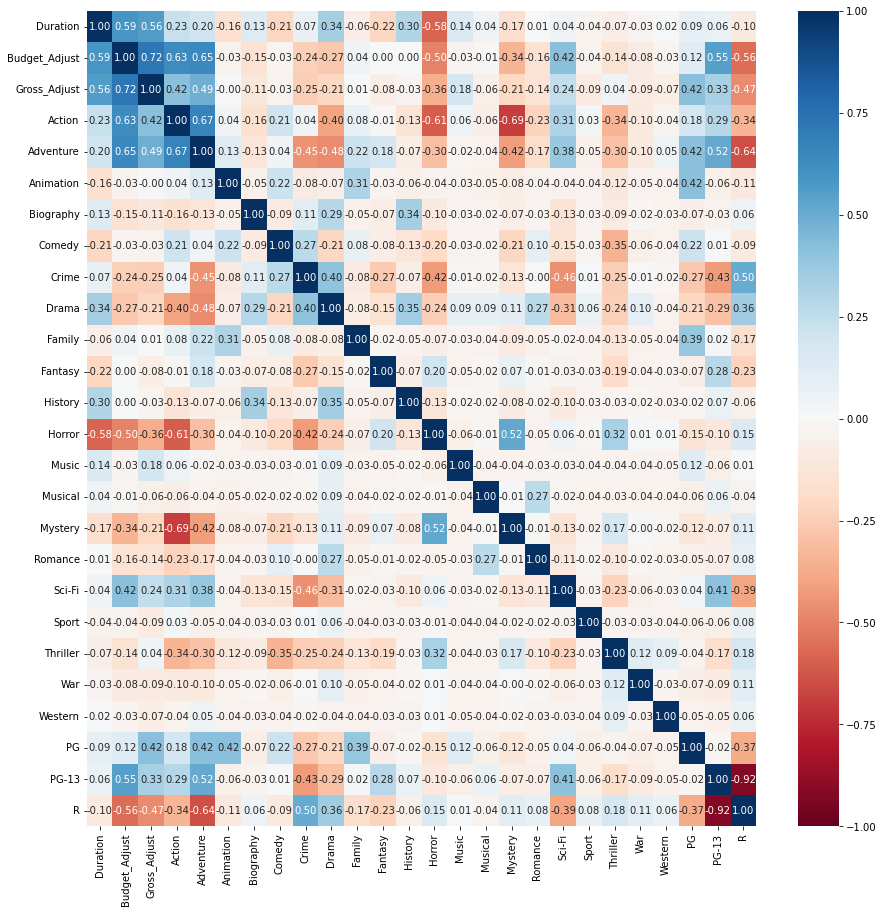

In [11]:
# seaborn correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
#center set to white - judge positive and negative correlation on equal footing 
#vmin/vmax specifices what values will start and end color map
#fmt tells seaborn how many decimal places we want
sns.heatmap(get_corr.corr(), cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt = '.2f')

In [12]:
sns.set_style('darkgrid')

https://stackoverflow.com/questions/53717543/reduce-number-of-plots-in-sns-pairplot

#### Pairplots: Identifying linear versus non-linear relationships

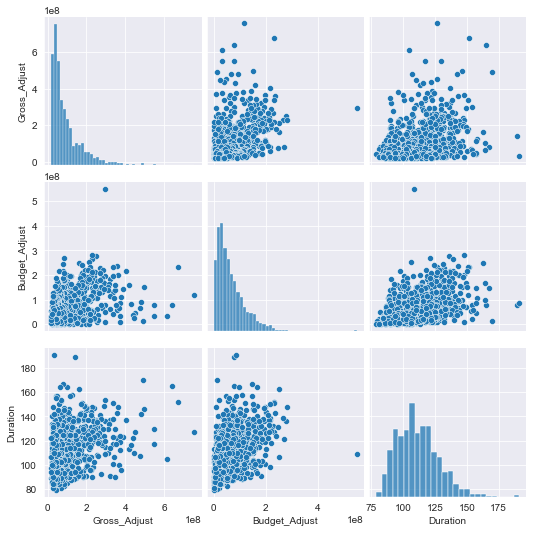

In [13]:
sns.pairplot(first_set, vars = ['Gross_Adjust', 'Budget_Adjust', 'Duration'])

#### Linear Regression Gross + Budget
Yes, linear relationship.
Each of those dots is probably visually the width of at least 1,00,000 units on the axis, so anything around or less than that would be difficult to visually distinguish when viewing the chart this "zoomed out

<AxesSubplot:xlabel='Budget_Adjust', ylabel='Gross_Adjust'>

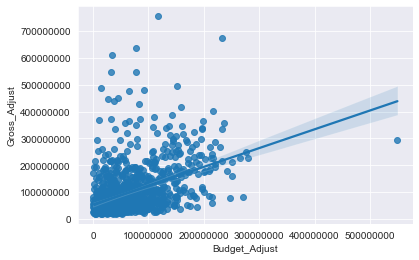

In [14]:
plt.ticklabel_format(style='plain')
sns.set(rc={"figure.figsize":(14, 10)}) #width, height
sns.regplot(x='Budget_Adjust', y='Gross_Adjust', data=first_set)

#### Linear Relation check on Categorical Variables - Is this possible? 

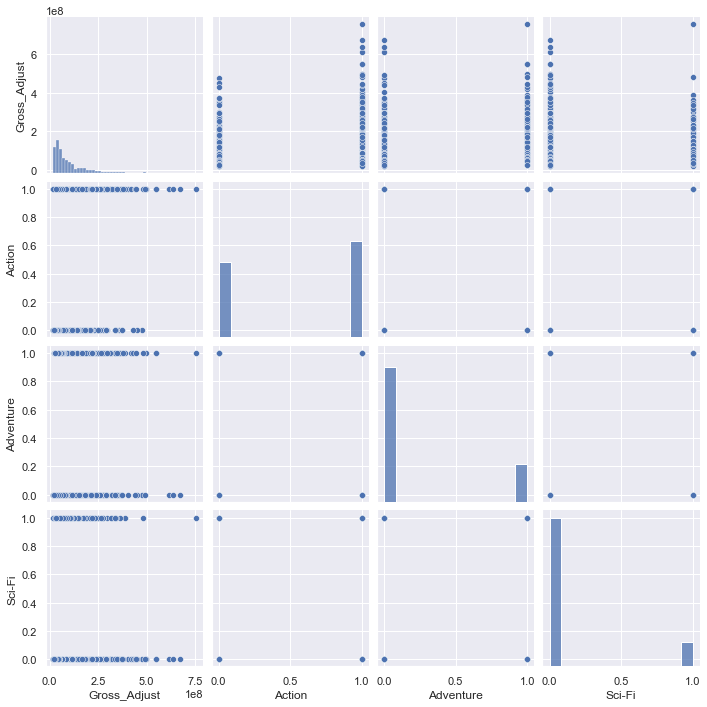

In [15]:
sns.pairplot(first_set, vars = ['Gross_Adjust', 'Action', 'Adventure', 'Sci-Fi',])

- Box plot: Distribution of gross by rating. Middle bar shows median value. PG-13 do make more money than R movies.
- ANova on PG-13 versus R rating was referenced. 

- Dot represents outlier, end of range. Aything passed whisker very statistically different. Box from 35th-75th percentile. 

What Alison does: when get to end of EDA and have model, she goes back and says is there a visual that will validate that? In this example, the box chart is reinforcing the coefficient finding on rating. A quick look at rating PG13 have a higher end distribution. 

#### StatsModels Linear Regression - All Featues 

In [18]:
movie_df.columns

Index(['Title', 'Duration', 'Genre', 'Rating', 'Gross', 'Director', 'Lead',
       'Year', 'Budget_Update', 'Budget_Adjust', 'Gross_Adjust', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'PG',
       'PG-13', 'R'],
      dtype='object')

In [19]:
# drop target column and others not needed
x = movie_df.drop(columns = ['Title','Genre', 'Rating','Gross', 'Gross_Adjust', 'Director', 'Lead', 'Year', 'Budget_Update'])
x = sm.add_constant(x)

# target
y = movie_df['Gross_Adjust']

#model structure
model = sm.OLS(y,x, data = movie_df)

movie_fit = model.fit()
predictions = movie_fit.predict(x)

movie_fit.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gross_Adjust   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     20.19
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.81e-70
Time:                        10:50:04   Log-Likelihood:                -21199.
No. Observations:                1085   AIC:                         4.245e+04
Df Residuals:                    1060   BIC:                         4.257e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -9.04e+06   2.12e+07     -0.427      0.670   -5.06e+07    3.25e+07
Duration       1.092e+06   1.76e+05      6.215      0.000    7.47e+05    1.44e+06
Budget_Adjust     0.5463      0.054     10.091      0.000       0.440       0.653
Action        -6.311e+06    9.1e+06     -0.694      0.488   -2.42e+07    1.15e+07
Adventure     -6.174e+06   9.77e+06     -0.632      0.528   -2.54e+07     1.3e+07
Animation     -4.366e+07   3.29e+07     -1.328      0.185   -1.08e+08    2.09e+07
Biography     -9.546e+06   1.84e+07     -0.518      0.605   -4.57e+07    2.66e+07
Comedy        -9.489e+06    1.1e+07     -0.863      0.389   -3.11e+07    1.21e+07
Crime         -7.777e+06   8.54e+06     -0.911      0.363   -2.45e+07    8.98e+06
Drama         -1.122e+07   9.17e+06     -1.223      0.222   -2.92e+07    6.79e+06
Family        -9.071e+07   3.04e+07     -2.982      0.003    -1.5e+08    -3.1e+07
Fantasy       -1.487e+07   1.32e+07     -1.128      0.260   -4.07e+07     1.1e+07
History       -4.628e+07    1.8e+07     -2.571      0.010   -8.16e+07    -1.1e+07
Horror        -5.441e+06   1.03e+07     -0.529      0.597   -2.56e+07    1.47e+07
Music          2.001e+08   5.45e+07      3.674      0.000    9.32e+07    3.07e+08
Musical        -7.69e+07   7.64e+07     -1.007      0.314   -2.27e+08     7.3e+07
Mystery       -9.347e+06   8.96e+06     -1.044      0.297   -2.69e+07    8.23e+06
Romance       -1.423e+07   1.34e+07     -1.062      0.288   -4.05e+07    1.21e+07
Sci-Fi         -9.19e+06   1.01e+07     -0.913      0.361   -2.89e+07    1.06e+07
Sport         -7.841e+07   7.55e+07     -1.038      0.300   -2.27e+08    6.98e+07
Thriller       3.726e+06   1.03e+07      0.360      0.719   -1.66e+07     2.4e+07
War           -3.767e+07   5.35e+07     -0.703      0.482   -1.43e+08    6.74e+07
Western       -1.053e+08   7.57e+07     -1.391      0.164   -2.54e+08    4.32e+07
PG             5.864e+07   1.07e+07      5.473      0.000    3.76e+07    7.97e+07
PG-13         -2.613e+07   7.68e+06     -3.403      0.001   -4.12e+07   -1.11e+07
R             -4.156e+07   7.74e+06     -5.370      0.000   -5.67e+07   -2.64e+07
==============================================================================
Omnibus:                      629.425   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7292.331
Skew:                           2.462   Prob(JB):                         0.00
Kurtosis:                      14.707   Cond. No.                     1.17e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-14. This might indicate that there are
strong multicollinearity problems or that the design ma

#### Plot Residuals vs Predictions

Text(0.5, 0, 'Prediction')

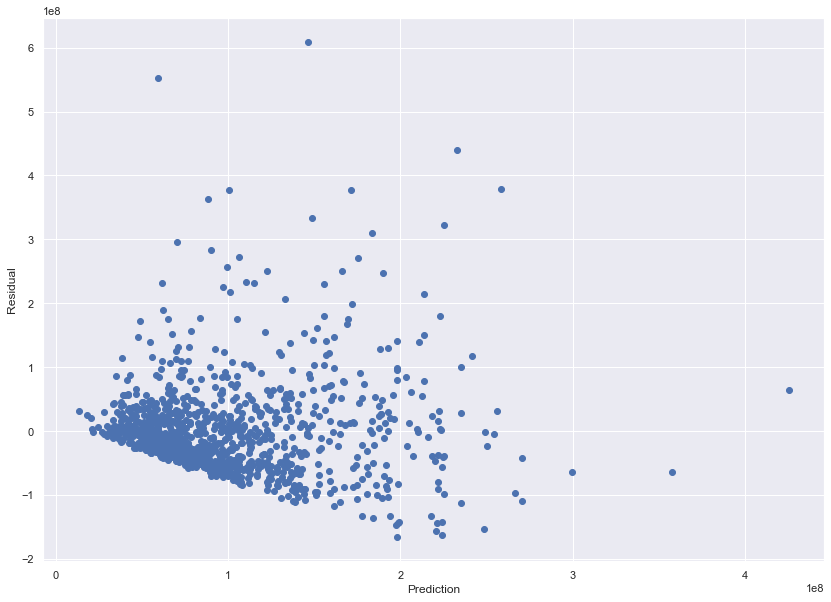

In [20]:
# Plot residuals vs. predictions
fig = plt.scatter(movie_fit.predict(), movie_fit.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')

#### Rating Analysis

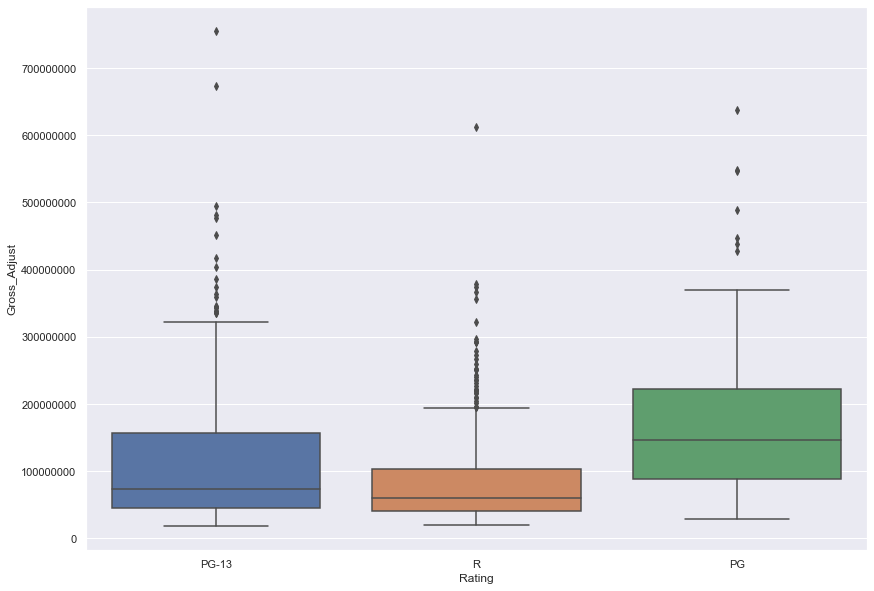

In [21]:
sns.boxplot(data=movie_df, x='Rating', y='Gross_Adjust')
#removes scientific notation:
plt.ticklabel_format(style='plain', axis='y')

In [22]:
movie_df.Rating.value_counts()

R        630
PG-13    383
PG        72
Name: Rating, dtype: int64